In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
x,y=load_diabetes(return_X_y=True)

In [3]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
x.shape

(442, 10)

In [5]:
y.shape

(442,)

In [6]:
#### using linear regression model 

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
x_train

array([[-0.00188202, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.06291688,  0.04034337],
       [-0.00914709, -0.04464164,  0.01103904, ..., -0.03949338,
         0.01703607, -0.0052198 ],
       [ 0.02354575,  0.05068012, -0.02021751, ..., -0.03949338,
        -0.09643495, -0.01764613],
       ...,
       [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
         0.08449153, -0.01764613],
       [-0.05273755,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03606033, -0.04249877],
       [ 0.00175052,  0.05068012,  0.05954058, ...,  0.1081111 ,
         0.06898589,  0.12732762]])

In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
lr=LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(x_test)

In [13]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [14]:
lr.intercept_

151.88331005254167

In [15]:
##### using selfmade regression model for multi input col


In [16]:
class MyMLR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        
        #cal the coff
        betas = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
        self.coef_ = betas[1:]
        self.intercept_ = betas[0]
        
    def predict(self,x_test):
        y_pred = np.dot(x_test,self.coef_) + self.intercept_
        return y_pred

In [17]:
mylr = MyMLR()

In [18]:
mylr.fit(x_train,y_train)

In [19]:
mylr.predict(x_test)

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [23]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

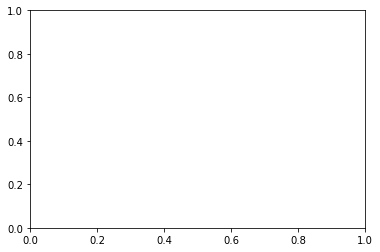

In [24]:
plt.scatter(x,y)